In [ ]:
! pip install -U classiq

In [ ]:
import classiq
classiq.authenticate()

Your user code: TWGG-RLDV
If a browser doesn't automatically open, please visit this URL from any trusted device: https://auth.classiq.io/activate?user_code=TWGG-RLDV


## Problem 1

Follow the example from Bootcamp 4 for creating the quantum walk operator for the case of a circle with 4 nodes.


### The quantum operator for a circle with 4 nodes is exactly the same model as the quantum operator of 4 nodes on a square presented during lecture (same number of nodes and no boundaries, which generate the same periodic behavior).

In [ ]:
from classiq import *

size = 2 #(2^size number of vertices)

@qfunc
def prepare_minus(x: QBit):
  X(x)
  H(x)


@qfunc
def diffuzer_oracle(aux: Output[QNum],x:QNum):
  aux^=(x!=0)


@qfunc
def zero_diffuzer(x: QNum):
  aux = QNum('aux')
  allocate(1,aux)
  within_apply(compute=lambda: prepare_minus(aux),
              action=lambda: diffuzer_oracle)


def W_iteration(i:int,vertices: QNum, adjacent_vertices:QNum):
    prob = [0,0,0,0]
    prob[(i+1)% 4]=0.5
    prob[(i-1)% 4]=0.5
    print(f'State={i}, prob vec ={prob}')

    control(ctrl=vertices==i,
            operand=lambda: within_apply(
              compute= lambda: inplace_prepare_state(probabilities=prob, bound=0.01, target=adjacent_vertices),
              action= lambda: zero_diffuzer(adjacent_vertices)))


@qfunc
def W_operator(vertices:QNum, adjacent_vertices: QNum):
    for i in range(2**size):
      W_iteration(i,vertices,adjacent_vertices)


@qfunc
def edge_oracle(res:Output[QBit], vertices: QNum, adjacent_vertices: QNum):
  res |= (((vertices+adjacent_vertices)%2) ==1)


@qfunc
def bitwise_swap(x: QArray[QBit], y:QArray[QBit]):
  repeat(count= x.len,
    iteration= lambda i: SWAP(x[i],y[i]))


@qfunc
def S_operator(vertices:QNum, adjacent_vertices: QNum):
    res = QNum('res')
    edge_oracle(res,vertices,adjacent_vertices)
    control(ctrl= res==1,
        operand= lambda: bitwise_swap(vertices,adjacent_vertices))

@qfunc
def main(vertices:Output[QNum], adjacent_vertices:Output[QNum]):

  allocate(size,vertices)
  hadamard_transform(vertices)
  allocate(size,adjacent_vertices)

  W_operator(vertices,adjacent_vertices)
  S_operator(vertices,adjacent_vertices)

qmod = create_model(main)
qprog = synthesize(qmod)
show(qprog)

State=0, prob vec =[0, 0.5, 0, 0.5]
State=1, prob vec =[0.5, 0, 0.5, 0]
State=2, prob vec =[0, 0.5, 0, 0.5]
State=3, prob vec =[0.5, 0, 0.5, 0]
Opening: https://platform.classiq.io/circuit/5e78f931-3df4-4ec9-b1e0-452557d08090?version=0.43.2


## The native/qmod code

In [ ]:
write_qmod(qmod, "6-12size2circle")

The circuit synthesized has 9 qubits (5 auxiliary) and gate depth 33.
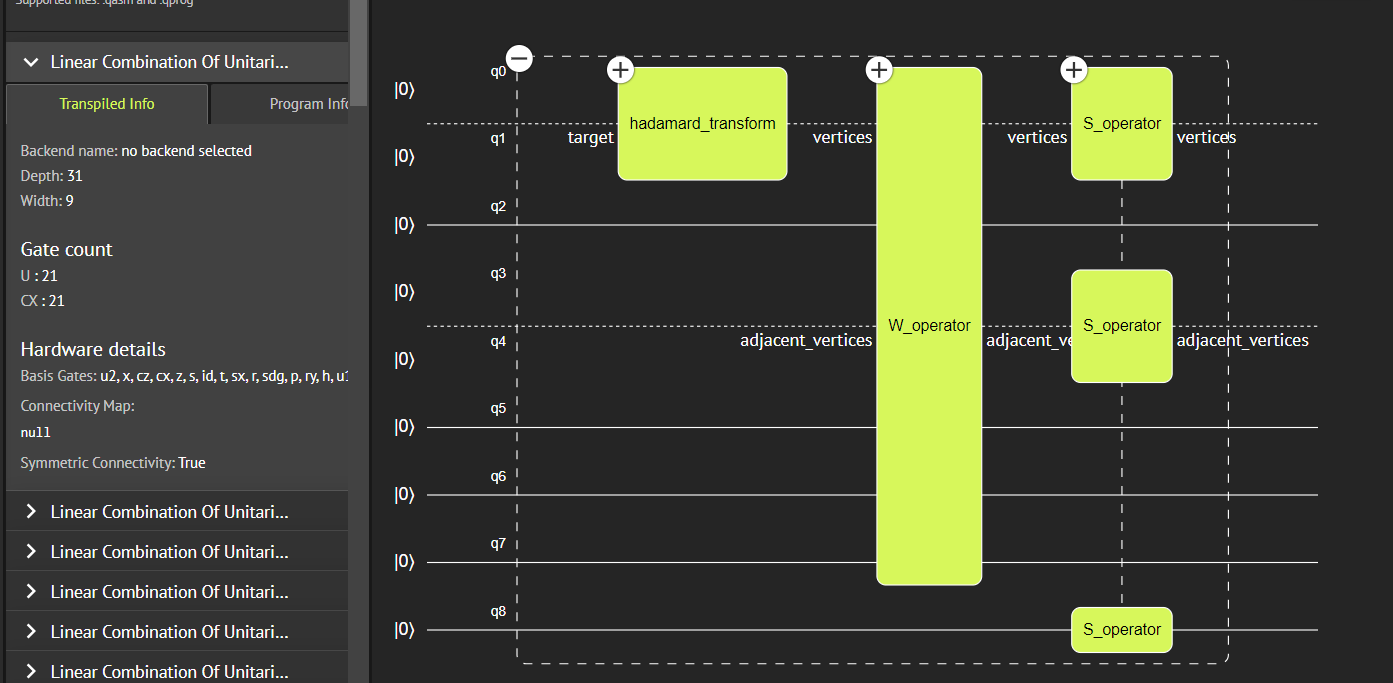

## Problem 2
Design the quantum walk operator for the case of a line with 16 nodes.

### The quantum operator for the case of a line with 16 nodes presents 2 boundaries where the walk is reflected, at node 0 and 15 (leftmost and rightmost).

In [ ]:
size = 4 #(2^4=16 the number of vertices)

@qfunc
def prepare_minus(x: QBit):
  X(x)
  H(x)


@qfunc
def diffuzer_oracle(aux: Output[QNum],x:QNum):
  aux^=(x!=0)


@qfunc
def zero_diffuzer(x: QNum):
  aux = QNum('aux')
  allocate(1,aux)
  within_apply(compute=lambda: prepare_minus(aux),
              action=lambda: diffuzer_oracle)


def W_iteration(i:int,vertices: QNum, adjacent_vertices:QNum):
    prob = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0 ]
    if i==0:
      prob[1]=1
    elif i==15:
        prob[14]=1
    else:
      prob[i+1]=0.5
      prob[i-1]=0.5
    print(f'State={i}, prob vec ={prob}')

    control(ctrl=vertices==i,
            operand=lambda: within_apply(
              compute= lambda: inplace_prepare_state(probabilities=prob, bound=0.01, target=adjacent_vertices),
              action= lambda: zero_diffuzer(adjacent_vertices)))


@qfunc
def W_operator(vertices:QNum, adjacent_vertices: QNum):
    for i in range(2**size):
      W_iteration(i,vertices,adjacent_vertices)


@qfunc
def edge_oracle(res:Output[QBit], vertices: QNum, adjacent_vertices: QNum):
  res |= (((vertices+adjacent_vertices)%2) ==1)


@qfunc
def bitwise_swap(x: QArray[QBit], y:QArray[QBit]):
  repeat(count= x.len,
    iteration= lambda i: SWAP(x[i],y[i]))


@qfunc
def S_operator(vertices:QNum, adjacent_vertices: QNum):
    res = QNum('res')
    edge_oracle(res,vertices,adjacent_vertices)
    control(ctrl= res==1,
        operand= lambda: bitwise_swap(vertices,adjacent_vertices))

@qfunc
def main(vertices:Output[QNum], adjacent_vertices:Output[QNum]):

  allocate(size,vertices)
  hadamard_transform(vertices)
  allocate(size,adjacent_vertices)

  W_operator(vertices,adjacent_vertices)
  S_operator(vertices,adjacent_vertices)

qmod = create_model(main)
qprog = synthesize(qmod)
show(qprog)

State=0, prob vec =[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
State=1, prob vec =[0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
State=2, prob vec =[0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
State=3, prob vec =[0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
State=4, prob vec =[0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
State=5, prob vec =[0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0]
State=6, prob vec =[0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0]
State=7, prob vec =[0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0]
State=8, prob vec =[0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0]
State=9, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0]
State=10, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0]
State=11, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0]
State=12, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0]
State=13, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 

## Write the Qmod file.

In [ ]:
write_qmod(qmod, "6-12size4line")

In [ ]:

circ_width = QuantumProgram.from_qprog(qprog).data.width
circ_depth = QuantumProgram.from_qprog(qprog).transpiled_circuit.depth
print(f"The circuit width is {circ_width} and the circuit_depth is {circ_depth}")

The circuit width is 25 and the circuit_depth is 2504


The program generated in default mode is optimized for depth, with **26 width (qubits)**, which is **over the maximum 25 qubits** that Classiq can execute for regular users.

After runs on different days, sometimes the platform synthesises a 25 qubits circuit to start (which seems to be caused by the algorithm generating the solutions). I had once even a first solution with 118 width. Interesting!

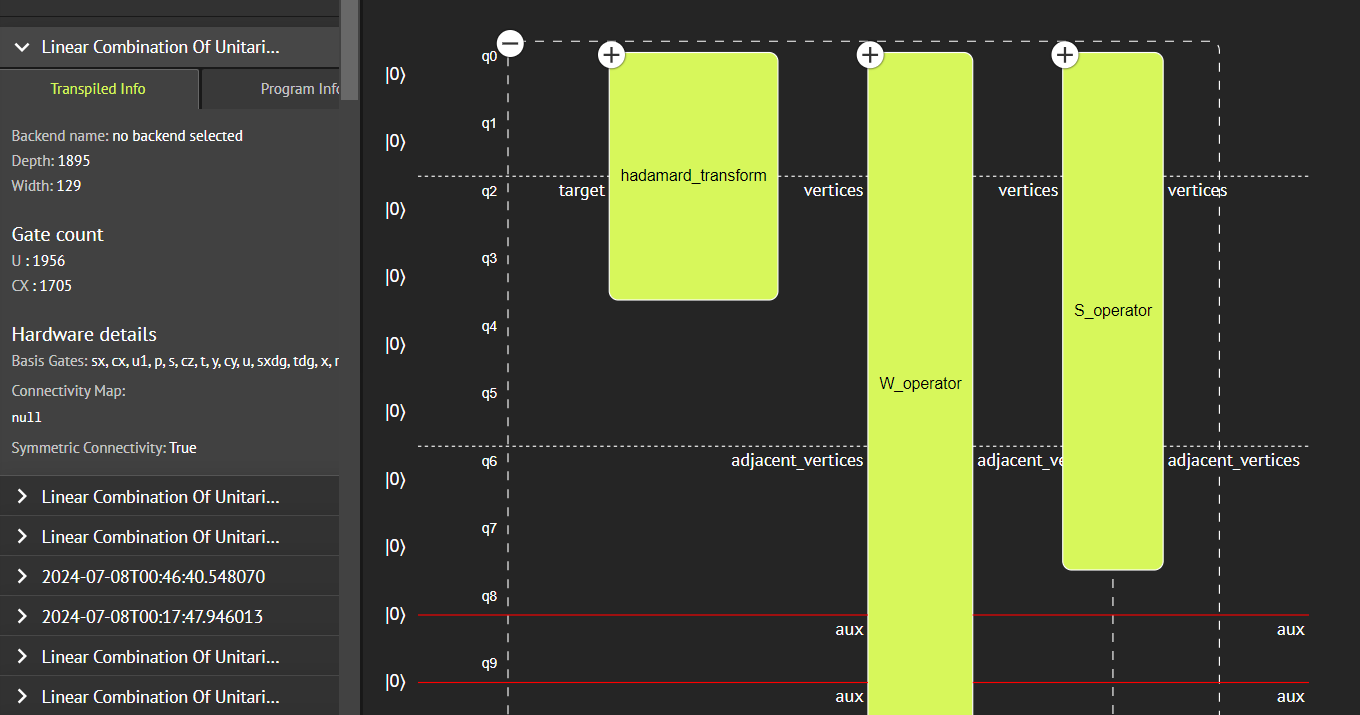

## Error

When trying to execute the 26 qubit circuit, an error message appears:

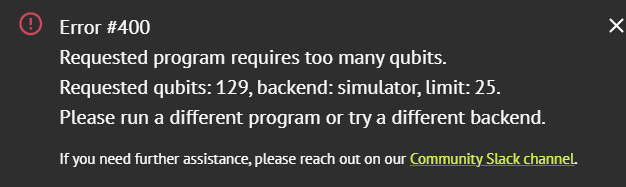

## Optimize for minimum width

We will attempt to optimize the circuit for minimum width, and hope that the optimization yields a circuit with 25 or less qubits.

In [ ]:
quantum_model_with_constraints = set_constraints(
    qmod, Constraints(optimization_parameter="width")
)

In [ ]:
quantum_program = synthesize(quantum_model_with_constraints)
circuit_width = QuantumProgram.from_qprog(quantum_program).data.width
circuit_depth = QuantumProgram.from_qprog(quantum_program).transpiled_circuit.depth
print(f"The circuit width is {circuit_width} and the circuit_depth is {circuit_depth}")

The circuit width is 25 and the circuit_depth is 2317


# We are lucky!

Our **optimized for width** circuit has **25 qubits**, with an increase in gate depth to 2317.

In [ ]:
qprog = synthesize(quantum_model_with_constraints)
show(qprog)

Opening: https://platform.classiq.io/circuit/4cf1b7b4-1943-4ceb-b132-d821f76d46e8?version=0.43.2


In [ ]:
write_qmod(qmod, "6-12size4lineoptimized")

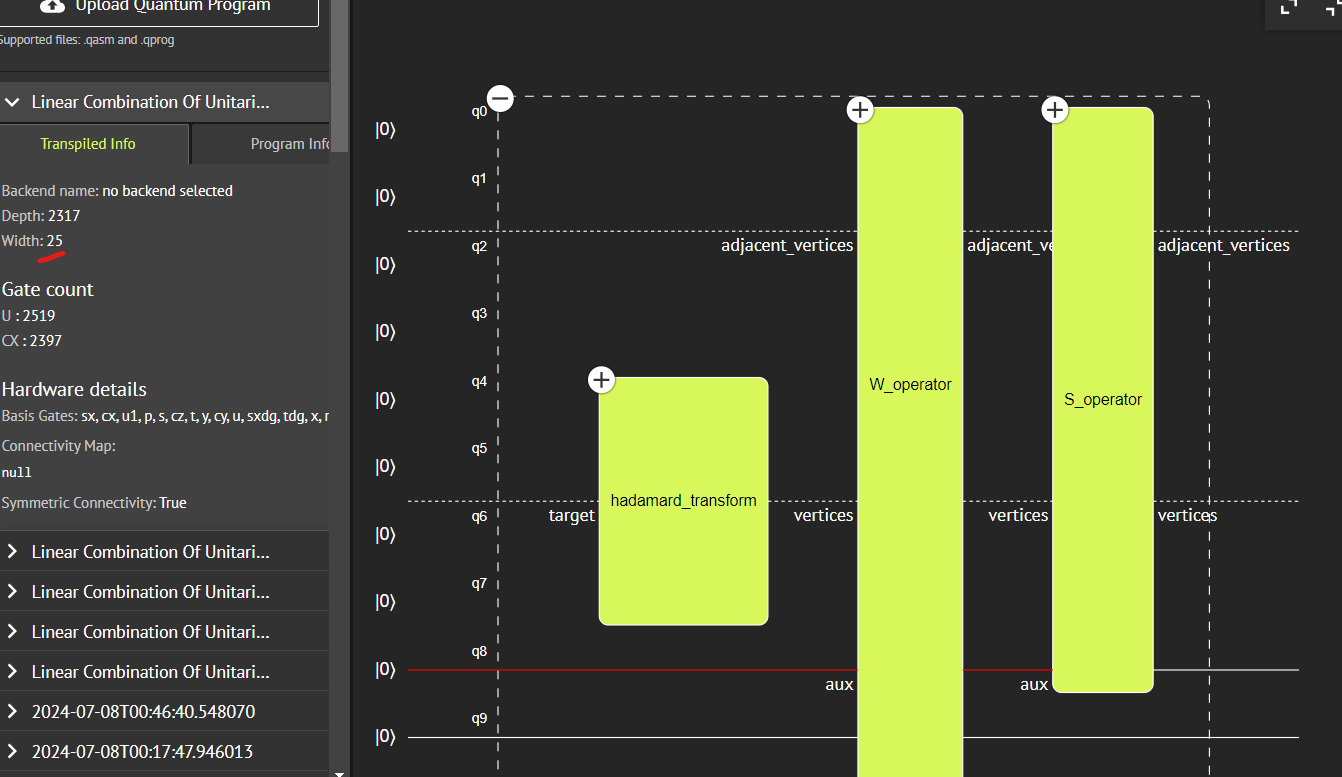

In [ ]:
res = execute(qprog).result()
res

[TaggedExecutionDetails(value_type=<SavedResultValueType.ExecutionDetails: 'ExecutionDetails'>, name='result', value=ExecutionDetails(vendor_format_result={}, counts={'00110000': 121, '00001100': 133, '10110000': 124, '11010000': 120, '00000000': 132, '00000010': 129, '01110000': 129, '00001010': 123, '00000100': 137, '00010000': 143, '10010000': 122, '11110000': 132, '00001000': 130, '00000110': 121, '00001110': 135, '01010000': 117}, counts_lsb_right=True, parsed_states={'00110000': {'vertices': 0.0, 'adjacent_vertices': 3.0}, '00001100': {'vertices': 12.0, 'adjacent_vertices': 0.0}, '10110000': {'vertices': 0.0, 'adjacent_vertices': 11.0}, '11010000': {'vertices': 0.0, 'adjacent_vertices': 13.0}, '00000000': {'vertices': 0.0, 'adjacent_vertices': 0.0}, '00000010': {'vertices': 2.0, 'adjacent_vertices': 0.0}, '01110000': {'vertices': 0.0, 'adjacent_vertices': 7.0}, '00001010': {'vertices': 10.0, 'adjacent_vertices': 0.0}, '00000100': {'vertices': 4.0, 'adjacent_vertices': 0.0}, '0001